In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib.gridspec import GridSpec

In [2]:
df = pd.read_csv('./data/sales_data.csv')
df['order_date'] = pd.to_datetime(df['order_date'])

plt.style.use('ggplot')

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_date           51290 non-null  datetime64[ns]
 1   time                 51290 non-null  object        
 2   aging                51289 non-null  float64       
 3   customer_id          51290 non-null  int64         
 4   gender               51290 non-null  object        
 5   device_type          51290 non-null  object        
 6   customer_login_type  51290 non-null  object        
 7   product_category     51290 non-null  object        
 8   product              51290 non-null  object        
 9   sales                51289 non-null  float64       
 10  quantity             51288 non-null  float64       
 11  discount             51289 non-null  float64       
 12  profit               51290 non-null  float64       
 13  shipping_cost        51289 non-

## Sales frequency

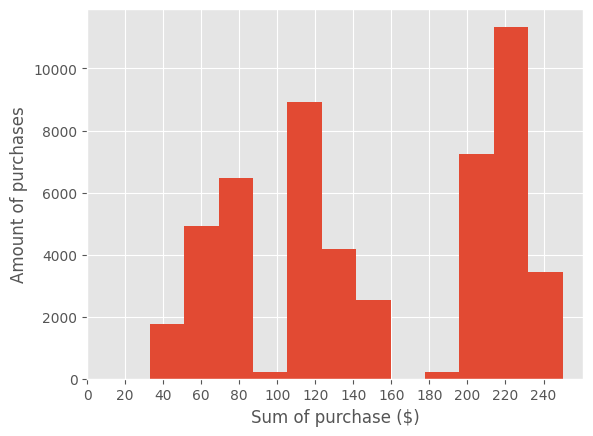

In [3]:
def setup_sales_frequency_plot(ax: Axes) -> Axes:
  ax.hist(df['sales'], bins=12)
  ax.set_xticks(np.arange(0, df['sales'].max(), 20))
  ax.set_xlabel('Sum of purchase ($)')
  ax.set_ylabel('Amount of purchases')

setup_sales_frequency_plot(plt.subplot()) 

We see that there are 3 maximums of sales amount, it's 80$, 120$, 220$. I think it's related with price of popular products.

## Sales by date

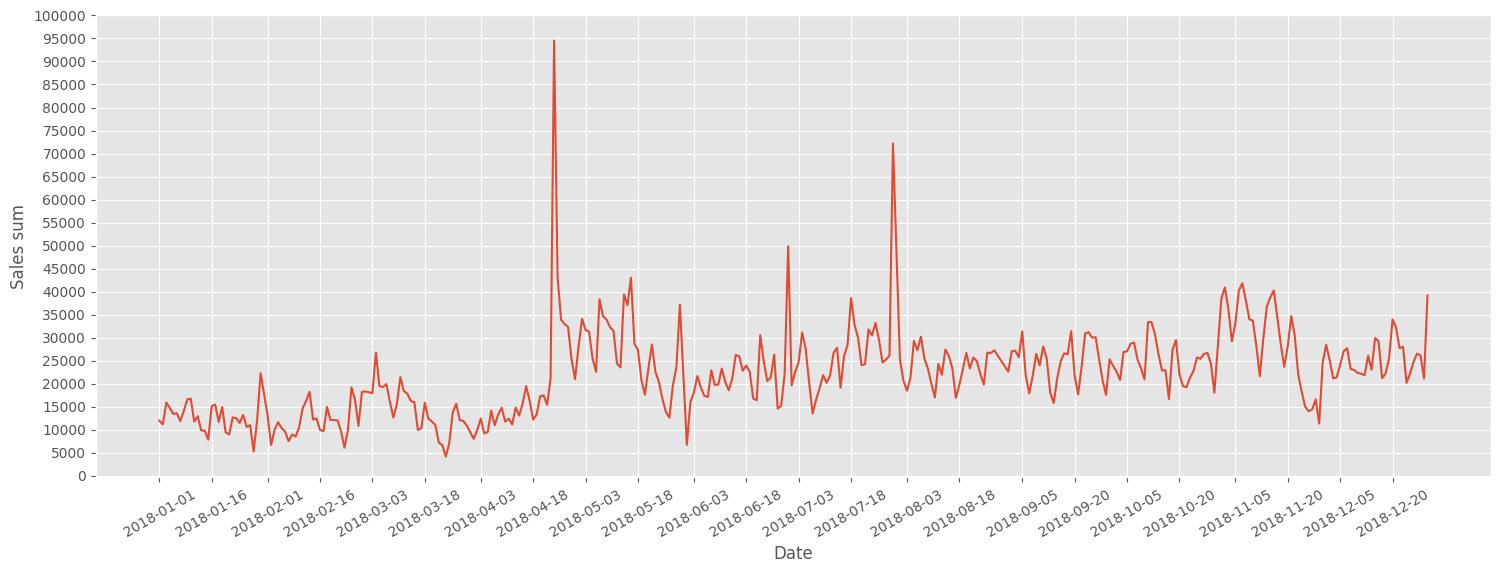

In [4]:

def setup_sales_by_date_plot(ax: Axes) -> Axes:
  grouped_df = df.groupby('order_date', as_index=False)['sales'].sum()
  x_ticks_indices = np.arange(0, grouped_df['order_date'].shape[0], 15)

  ax.plot(grouped_df['order_date'], grouped_df['sales'])
  ax.set_xlabel('Date')
  ax.set_ylabel('Sales sum')
  ax.set_yticks(np.arange(0, plt.gca().get_ylim()[1] + 5000, 5000))
  ax.set_xticks(grouped_df['order_date'][x_ticks_indices])
  ax.tick_params(axis='x', rotation=30)

fig, ax = plt.subplots(figsize=(18, 6))
setup_sales_by_date_plot(ax)

We see maximum sales in second part of April 2018 it was near 95000$ sales per day. And after that peak average sales increased from 10k to 20k.

## Category frequency

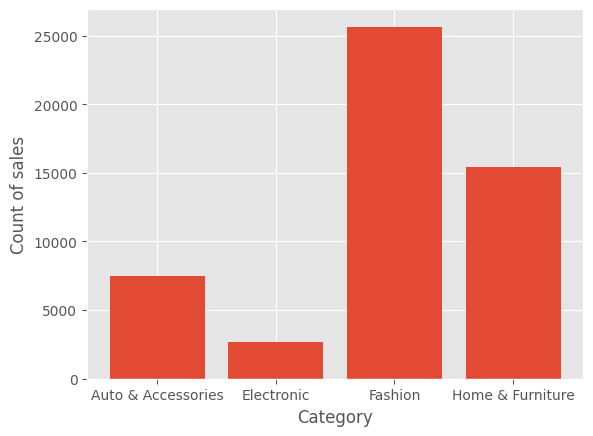

In [5]:
def setup_category_frequency_plot(ax: Axes) -> Axes:
  df_grouped = df.groupby('product_category', as_index=False)['sales'].count()
  ax.bar(df_grouped['product_category'], df_grouped['sales'])
  ax.set_xlabel('Category')
  ax.set_ylabel('Count of sales')
  
setup_category_frequency_plot(plt.subplot())

The most popular category is `Fashion` and the least popular is `Electronic`.

## Profit and sales

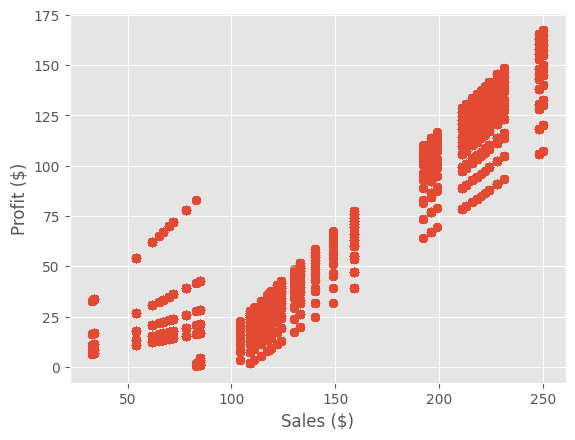

In [6]:
def setup_profit_sales_plot(ax: Axes) -> Axes:
  ax.scatter(df['sales'], df['profit'], alpha=0.5)
  ax.set_ylabel('Profit ($)')
  ax.set_xlabel('Sales ($)')  
  
setup_profit_sales_plot(plt.subplot())

In [7]:
df['sales'].corr(df['profit'])

np.float64(0.9167616311944826)

We see strong positive correlation between profit and sales. It's logical because profit is calculated as sales - cost.

## All visualizations together

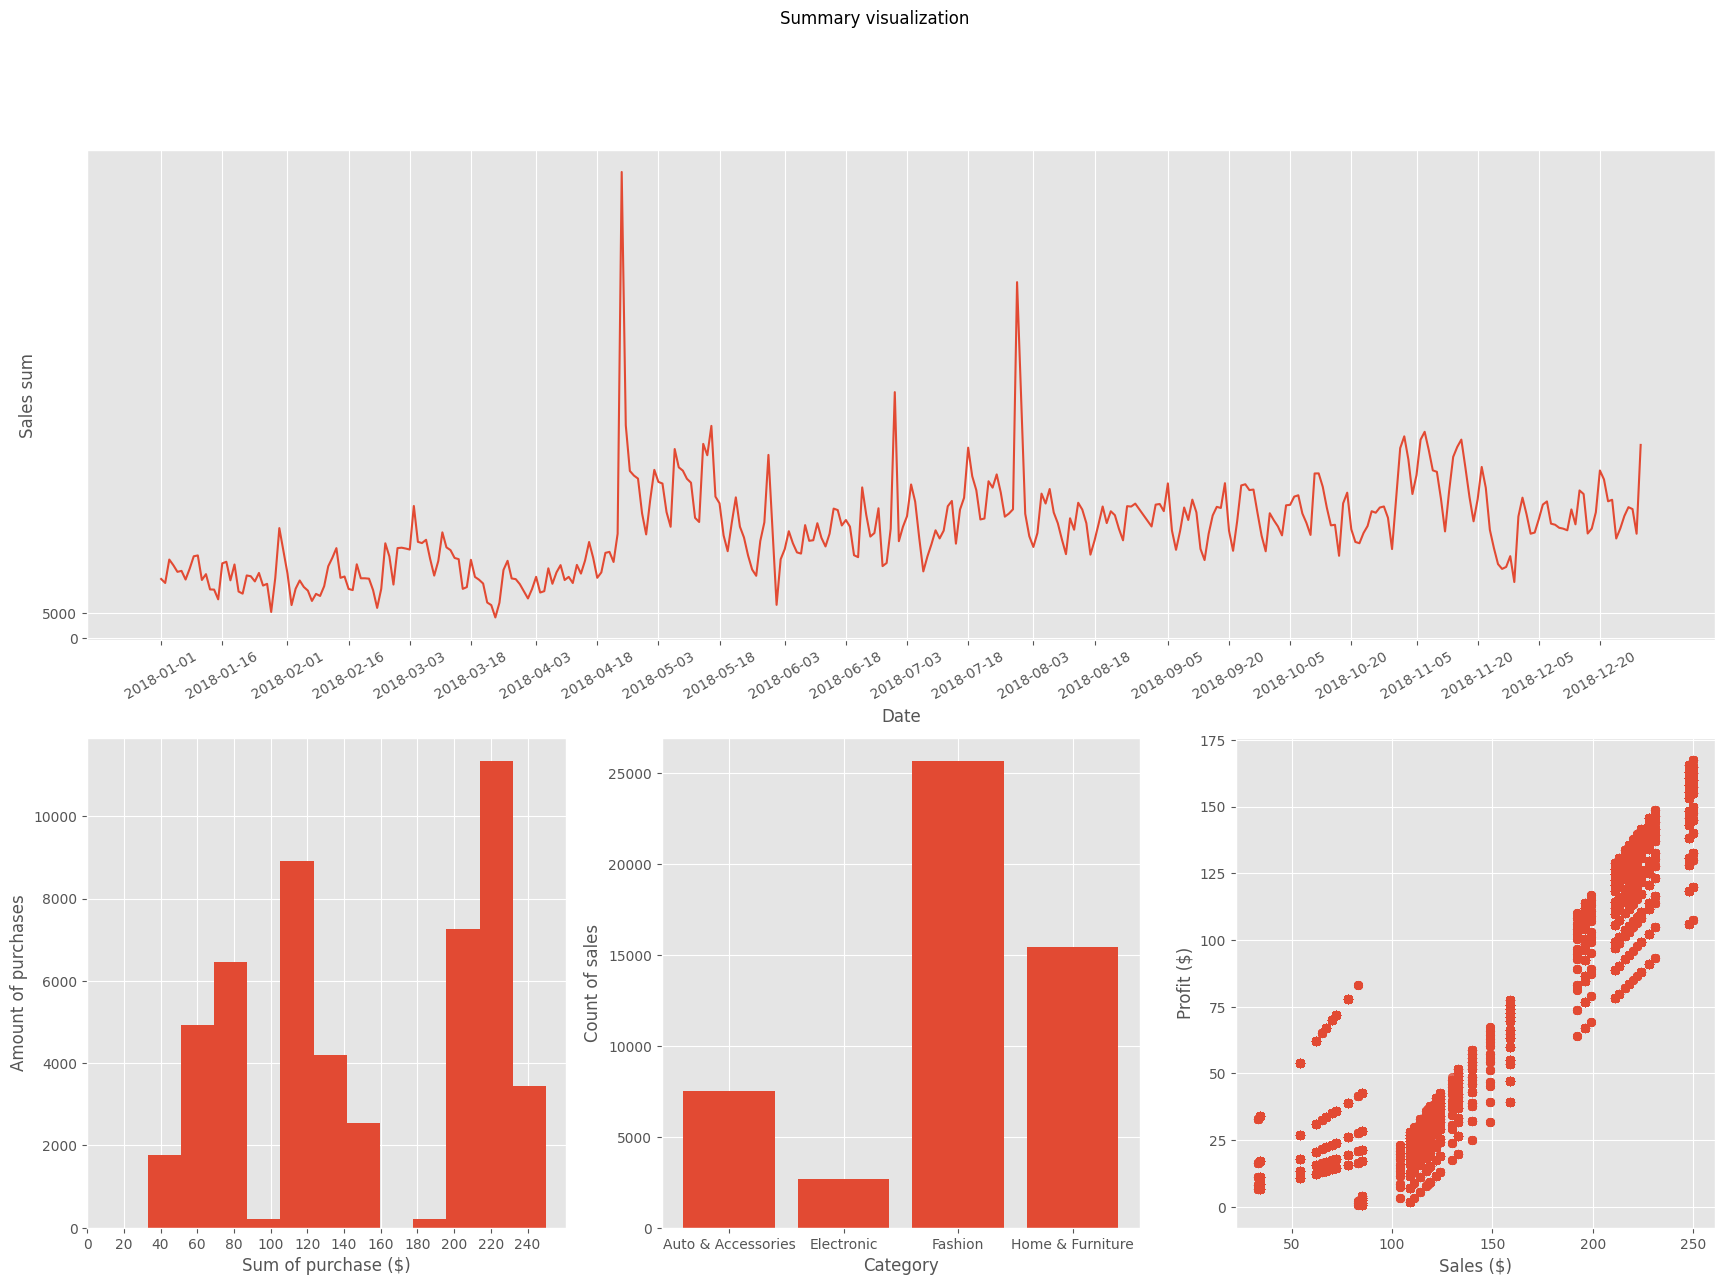

In [9]:
fig = plt.figure(figsize=(21, 14))
gs = GridSpec(2, 3, figure=fig)

ax1 = fig.add_subplot(gs[0, :3])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])

setup_sales_by_date_plot(ax1)
setup_sales_frequency_plot(ax2)
setup_category_frequency_plot(ax3)
setup_profit_sales_plot(ax4)

fig.suptitle('Summary visualization')
plt.show()